Survived (no = 0 , yes = 1)

In [267]:
import warnings
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [268]:
warnings.filterwarnings('ignore',category=pd.errors.SettingWithCopyWarning)

&nbsp;

## Analise dos dados

In [269]:
gender  = pd.read_csv(r'titanic/gender_submission.csv') 
train   = pd.read_csv(r'titanic/train.csv')
test    = pd.read_csv(r'titanic/test.csv')

test    = test.merge(
    right = gender,
    how   = 'inner',
    on    = 'PassengerId'
)

data  = pd.concat([train,test],axis=0)

In [270]:
data['Embarked'].loc[data['Embarked']=='C'] = 'Cherbourg'
data['Embarked'].loc[data['Embarked']=='Q'] = 'Queenstown'
data['Embarked'].loc[data['Embarked']=='S'] = 'Southampton' 

In [271]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton


In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [273]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [274]:
data.isna().nunique()

PassengerId    1
Survived       1
Pclass         1
Name           1
Sex            1
Age            2
SibSp          1
Parch          1
Ticket         1
Fare           2
Cabin          2
Embarked       2
dtype: int64

> Atributos `age` , `Fare` , `Cabin` , `Embarked` possuem atributos nulos
* **Imputar dados :**
    1. Para os atributos numericos binario irei fazer uma imputação com o interative imputer 
    2. Para os atributos numericos continuos irei fazer um imputação com simplesimputer com base na média

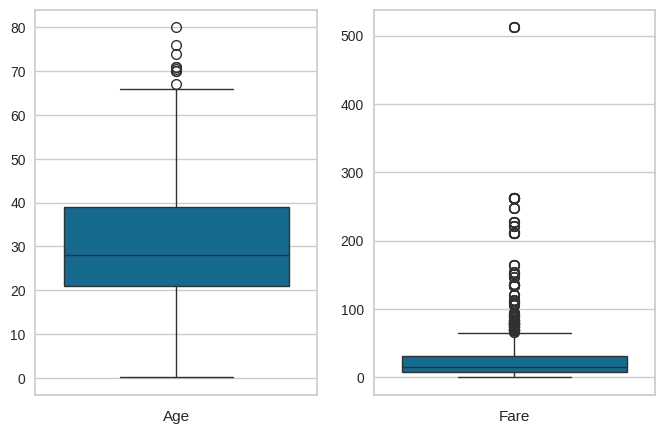

In [275]:
dataBox = data.select_dtypes(include=['float64'])
fig , ax = plt.subplots(1,2,figsize=(8,5))

for coluna,axis in zip(dataBox.columns,ax.flatten()): 
    sea.boxplot(dataBox[coluna],ax=axis)
    axis.set_xlabel(coluna)
    axis.set_ylabel('')
plt.show()

> Possui outliers , contudo , irei verificar quando for classificar se e necessário remover esse atributos

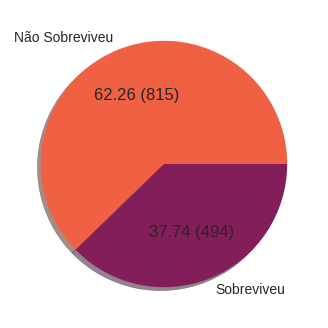

In [276]:
pizza = data['Survived'].value_counts()
color = sea.color_palette('rocket_r',n_colors=2)
plt.figure(figsize=(6,4))
plt.pie( x = pizza.values , labels = ['Não Sobreviveu','Sobreviveu'] , autopct = lambda x: '{:.2f} ({:.0f})'.format(x,(sum(pizza.values)*x)/100),colors=color,shadow=True)
plt.show()

> Classes estão desbalanceadas. Para a classificação se faz necessário o balanceamento (estrategia sea o undersampling)

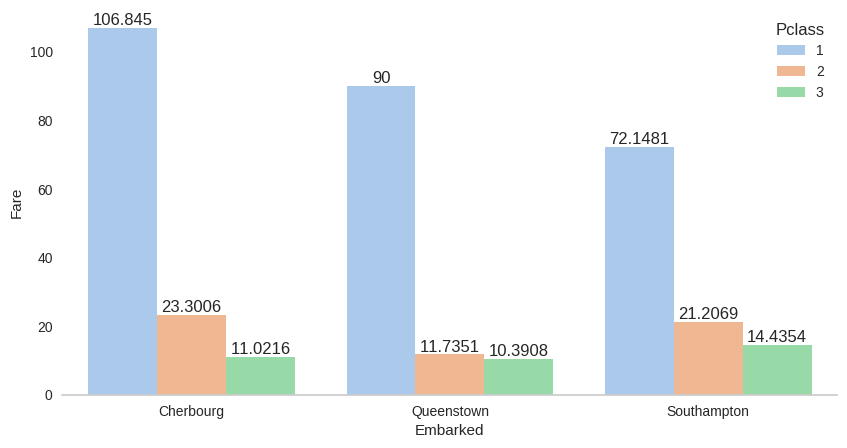

In [277]:
barData = data.groupby(by=['Pclass','Embarked'])['Fare'].mean().reset_index()

color = sea.color_palette('pastel',n_colors=3)
fig , ax = plt.subplots(1,1,figsize=(10,5))
bar = sea.barplot(x = barData['Embarked'] , y = barData['Fare'] , hue=barData['Pclass'] ,ax=ax ,palette=color)
bar.bar_label(bar.containers[0])
bar.bar_label(bar.containers[1])
bar.bar_label(bar.containers[2])

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.spines[['top','right','left']].set_visible(False)
ax.set_xlabel('Embarked')
plt.show()

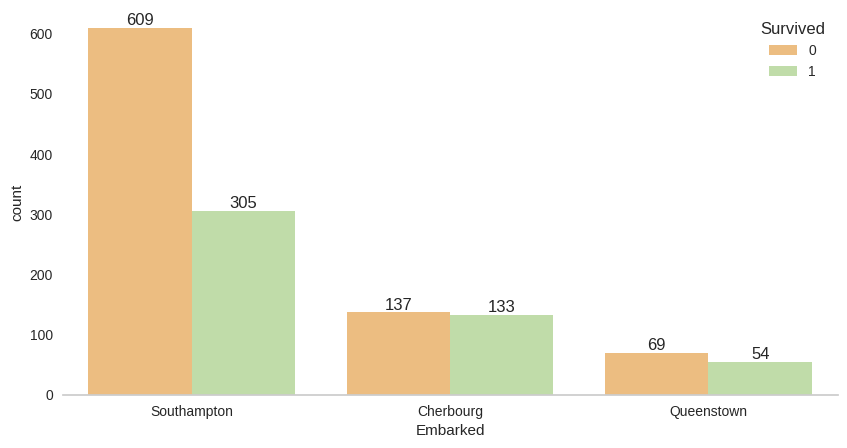

In [278]:
barData = data.groupby(by=['Survived'])['Embarked'].value_counts().reset_index()

color = sea.color_palette('Spectral',n_colors=2)
fig , ax = plt.subplots(1,1,figsize=(10,5))
bar = sea.barplot(x = barData['Embarked'] , y = barData['count'] , hue=barData['Survived'] ,ax=ax ,palette=color)
bar.bar_label(bar.containers[0])
bar.bar_label(bar.containers[1])

ax.grid(axis='y')
ax.set_axisbelow(True)
ax.spines[['top','right','left']].set_visible(False)
ax.set_xlabel('Embarked')
plt.show()

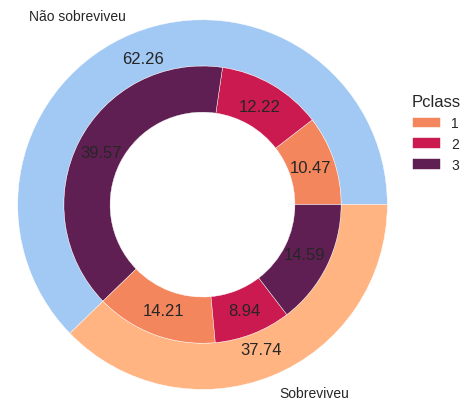

In [279]:
pizza = data.groupby(by=['Survived'])['Pclass'].value_counts().reset_index().sort_values(by='Pclass')

fig, ax = plt.subplots(1,1)
fig.set_figwidth(14)
fig.set_figheight(5)
colors1 = sea.color_palette('pastel')[0:2] 
colors2H = sea.color_palette('rocket_r',n_colors=3) 


ax.pie(x = pizza.groupby(by=['Survived'])['count'].sum(), labels= ['Não sobreviveu','Sobreviveu'] ,
       wedgeprops = dict(width=0.3, edgecolor='w'), autopct='%.2f' , pctdistance =0.85 ,colors=colors1 ,radius=1.2)

ax.pie(x = pizza.groupby(by=['Survived','Pclass'])['count'].sum() ,wedgeprops=dict(width=0.3, edgecolor='w'),
       radius=.9,autopct='%.2f',pctdistance=0.82 ,colors=colors2H )

legends = []
for value, color in zip(pizza['Pclass'].drop_duplicates().values, colors2H): 
       legends.append(mpatches.Patch(color=color, label=value))
ax.legend(title='Pclass'    ,handles=legends, bbox_to_anchor=(1.01,0.519,0,0.3))

plt.show()

In [280]:
data.groupby(by=['Embarked','Sex'])['Age'].mean()

Embarked     Sex   
Cherbourg    female    31.224490
             male      33.284386
Queenstown   female    25.458333
             male      31.557692
Southampton  female    27.877235
             male      29.942394
Name: Age, dtype: float64

&nbsp;

## Pré - processamento

In [281]:
from sklearn.experimental   import enable_iterative_imputer
from sklearn.impute         import SimpleImputer,IterativeImputer
from sklearn.linear_model   import LinearRegression
from sklearn.pipeline       import Pipeline
from sklearn.compose        import ColumnTransformer
from sklearn.base           import BaseEstimator,TransformerMixin,RegressorMixin
from sklearn.preprocessing  import LabelBinarizer,OneHotEncoder,MinMaxScaler

In [282]:
dataset = data.copy()

<Axes: >

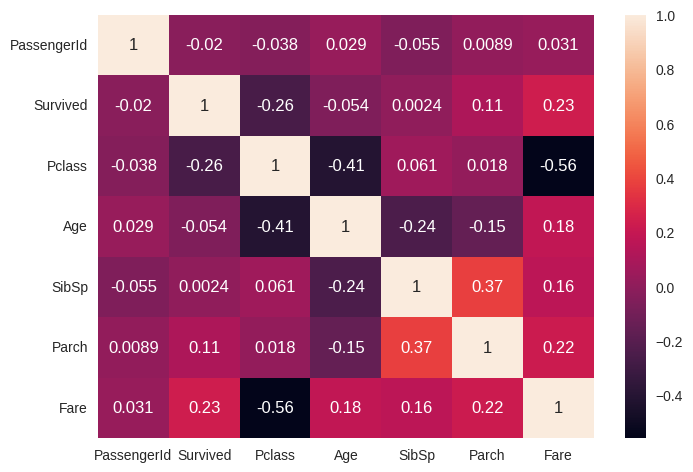

In [283]:
sea.heatmap(dataset.select_dtypes(exclude=['object']).corr(),annot=True)

Removendo colunas que não serao usadas

In [284]:
class RemovendoColunas(BaseEstimator,TransformerMixin):
    def __init__(self,colunas = None) -> None:
        self.columns = colunas

    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if ( self.columns == None) :
            return X
        return X.drop(columns = self.columns )

> Será removido os atributos `Name` ,`PassengerId`, `Ticket` 

In [285]:
dataset = RemovendoColunas(['Name' ,'PassengerId', 'Ticket']).fit_transform(dataset)

In [286]:
dataset.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,Southampton
1,1,1,female,38.0,1,0,71.2833,C85,Cherbourg
2,1,3,female,26.0,0,0,7.9250,NaN,Southampton


#### Transformando os atributos

In [287]:
classesGender = LabelBinarizer()
dataset['Sex'] = classesGender.fit_transform(dataset['Sex'])

OneHotEncoder

In [288]:
class OneHotEncoderPandas(BaseEstimator,TransformerMixin):
    def __init__(self,colunas=None):
        self.columns = colunas

    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        if (self.columns == None): return X
    
        elif (type(self.columns) == list):
            return pd.get_dummies(X,columns=self.columns)
        return pd.get_dummies(X,columns=[self.columns],dtype=int)

In [289]:
dataset = OneHotEncoderPandas('Pclass').fit_transform(dataset)

> Essas classes serão usadas na pipeline

In [290]:
index = dataset.isna().index

In [291]:
interative = IterativeImputer(LinearRegression())

dataset[['Age','Fare']] = interative.fit_transform(dataset.select_dtypes(exclude='object'))[:,[2,5]]

In [292]:
dataset['Embarked'].loc[dataset['Embarked'].isna()] = dataset['Embarked'].mode()[0]


In [293]:
dataset = OneHotEncoderPandas('Embarked').fit_transform(dataset)

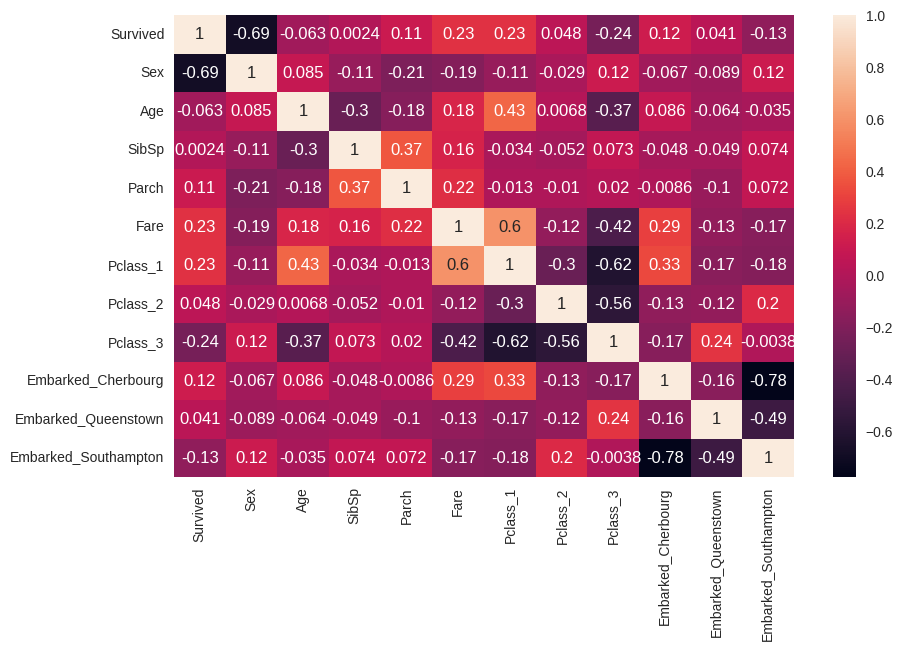

In [301]:
plt.figure(figsize=(10,6))
sea.heatmap(dataset.select_dtypes(exclude=['object']).corr(),annot=True)
plt.show()

Normalização

In [295]:
dataset[['Age','Fare']] = MinMaxScaler().fit_transform(dataset.select_dtypes(include=['float']))

In [302]:
dataset.drop(columns=['Cabin'],inplace=True)

&nbsp;

## Classificação

In [324]:
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.svm          import SVC
from sklearn.tree         import DecisionTreeClassifier
from sklearn.metrics      import *
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    train_test_split
)

In [297]:
from yellowbrick.classifier  import ROCAUC,PrecisionRecallCurve
from imblearn.under_sampling import RandomUnderSampler

In [331]:
X = dataset.drop(columns=['Survived'])
Y = dataset['Survived']
Y.value_counts()

Survived
0    815
1    494
Name: count, dtype: int64

In [332]:
under = RandomUnderSampler(sampling_strategy={0:500,1:494},random_state=42)

xunder , yunder = under.fit_resample(X,Y)

In [333]:
xtrain , xtest, ytrain, ytest = train_test_split(xunder,yunder,test_size=0.2,random_state=42)

## knn

In [315]:
params  = dict(
    n_neighbors = [5,7,9],
    weights     = ['uniform', 'distance'] ,
    algorithm   = ['auto', 'ball_tree', 'kd_tree', 'brute'],
    leaf_size   = [30,50,70],
    p           = [2,3,5,8,9],
) 
gridKnn = GridSearchCV(KNeighborsClassifier(),param_grid=params,scoring='accuracy')
gridKnn.fit(xunder,yunder)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 50, 70], 'n_neighbors': [5, 7, 9],
                         'p': [2, 3, 5, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [316]:
print(gridKnn.best_estimator_)
print(gridKnn.best_score_)

KNeighborsClassifier(algorithm='brute', n_neighbors=7, p=8)
0.8179151925344819


In [334]:
knn = gridKnn.best_estimator_
knn.fit(xtrain,ytrain)
predKnn = knn.predict(xtest)

In [335]:
print(classification_report(ytest,predKnn))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       133
           1       0.80      0.76      0.78        86

    accuracy                           0.83       219
   macro avg       0.83      0.82      0.82       219
weighted avg       0.83      0.83      0.83       219



### Logistic

In [336]:
logistic = LogisticRegression()
logistic.fit(xtrain,ytrain)
predLogistic = logistic.predict(xtest)

In [337]:
print(classification_report(ytest,predLogistic))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       133
           1       0.79      0.73      0.76        86

    accuracy                           0.82       219
   macro avg       0.81      0.80      0.81       219
weighted avg       0.82      0.82      0.82       219



In [327]:
params = dict(
    criterion = ['gini', 'entropy', 'log_loss'] ,
    splitter  = ['best', 'random'],
    max_features = ['auto', 'sqrt', 'log2']   
)
gridTree = GridSearchCV(DecisionTreeClassifier(),param_grid=params,scoring='accuracy')
gridTree.fit(xunder,yunder)

/home/mateus/MEGA/Projetos/AprendendoLivroMaosaObra-SkleanKerasTensorFLow/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mateus/MEGA/Projetos/AprendendoLivroMaosaObra-SkleanKerasTensorFLow/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mateus/MEGA/Projetos/AprendendoLivroMaosaObra-SkleanKerasTensorFLow/venv/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [329]:
gridTree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features='log2')

&nbsp;